In [1]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

2024-09-19 23:18:42.528774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 23:18:42.551742: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 23:18:42.558382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 23:18:42.575591: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 23:18:43.852726: W tensorflow/compiler/tf2

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

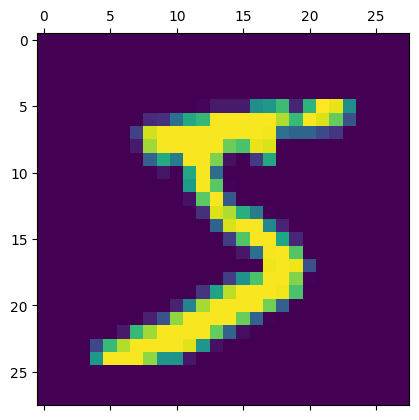

In [4]:
plt.matshow(X_train[0])

In [5]:
y_train[2]

4

In [6]:
# Scale down the values

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# we have to flatten the training dataset in order to feed it to a neural network.

In [9]:
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)
X_train_flatten.shape

(60000, 784)

In [10]:
X_test_flatten.shape

(10000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

I0000 00:00:1726768125.863895   55971 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-19 23:18:45.864908: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.fit(X_train_flatten, y_train, epochs=5)

2024-09-19 23:18:46.017273: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8085 - loss: 0.7250
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9149 - loss: 0.3085
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9178 - loss: 0.2896
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9226 - loss: 0.2762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9263 - loss: 0.2660


In [13]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.9150 - loss: 0.3009


[0.26554226875305176, 0.9264000058174133]

In [14]:
y_predicted = model.predict(X_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


In [15]:
y_predicted[3]

array([9.9927169e-01, 2.3804475e-08, 8.7749436e-02, 7.6052365e-03,
       4.2734384e-05, 1.0221353e-01, 6.4654261e-02, 1.1655569e-02,
       3.9523836e-02, 2.2877462e-02], dtype=float32)

In [16]:
import numpy as np
np.argmax(y_predicted[3])

0

In [17]:
y_test[3]

0

In [18]:
# converting y_predicted into y_test type values
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:8]

[7, 2, 1, 0, 4, 1, 4, 9]

In [19]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    7,    3,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    9,  929,   16,    8,    5,   11,   10,   38,    3],
       [   2,    0,   20,  927,    0,   16,    2,   12,   23,    8],
       [   2,    1,    6,    2,  915,    0,    7,    4,   10,   35],
       [   9,    3,    3,   39,    8,  769,    9,    5,   39,    8],
       [  12,    3,    9,    1,    8,   17,  901,    2,    5,    0],
       [   1,    6,   24,    6,    8,    0,    0,  945,    4,   34],
       [   5,    7,    7,   17,    9,   19,    7,   12,  885,    6],
       [  10,    7,    1,    8,   27,    5,    0,   19,   11,  921]],
      dtype=int32)>

In [20]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Truth')

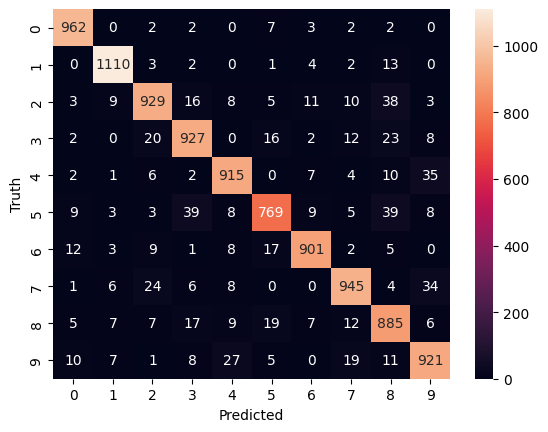

In [21]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
# Adding dense layer to the model

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

In [28]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5


2024-09-19 23:24:00.442551: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8673 - loss: 0.4676
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1263
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9744 - loss: 0.0839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0631
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0475


In [30]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9741 - loss: 0.0879  


[0.07349484413862228, 0.9786999821662903]

In [31]:
y_predicted = model.predict(X_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:8]

[7, 2, 1, 0, 4, 1, 4, 9]

In [35]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    2,    1,    2,    0,    3,    1,    4,    0],
       [   0, 1124,    4,    0,    0,    1,    3,    0,    3,    0],
       [   5,    6, 1004,    0,    1,    0,    3,    8,    5,    0],
       [   0,    0,    1,  998,    0,    2,    0,    4,    4,    1],
       [   0,    0,    3,    0,  962,    0,   10,    1,    2,    4],
       [   1,    0,    0,   11,    2,  863,    6,    2,    6,    1],
       [   4,    3,    1,    1,    1,    3,  944,    1,    0,    0],
       [   1,    5,    9,    3,    1,    0,    0, 1005,    2,    2],
       [   3,    0,    3,    3,    3,    2,    3,    5,  948,    4],
       [   2,    5,    0,    6,    8,    1,    2,   12,    1,  972]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

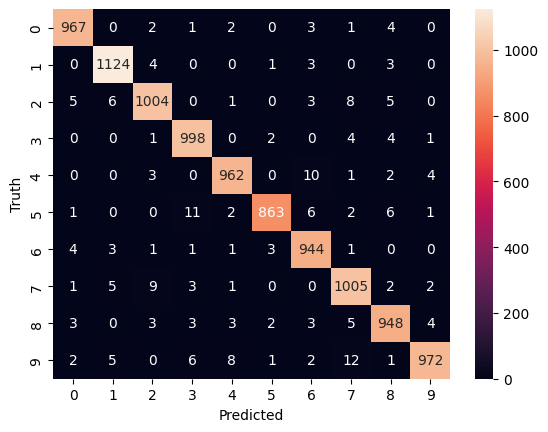

In [36]:
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
# Keras comes with the flatten layer as well, so we don't have to do flatten extra

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

In [42]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2024-09-19 23:36:01.237711: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8729 - loss: 0.4550
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.1343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0888
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9794 - loss: 0.0657
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0497


In [43]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.9680 - loss: 0.0994


[0.08353947103023529, 0.9728999733924866]